In [800]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch


def visualise_polygons(polygons):
    fig, ax = plt.subplots()

    ax.set_aspect('equal')

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])

    for polygon_coords in polygons:
        polygon = ptch.Polygon(polygon_coords, closed=True, fill=False, edgecolor='black')
        ax.add_patch(polygon)

    ax.autoscale()

    plt.show()

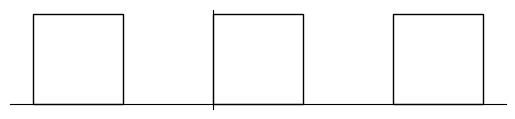

In [2]:
# Пример работы программы

visualise_polygons((((0,0), (0,1), (1,1), (1,0)), ((2,0), (2,1), (3,1), (3,0)), ((-2,0), (-2,1), (-1,1), (-1,0))))

In [504]:
import numpy as np
import itertools

def gen_rectangle(width, height, start_pos_x=0, start_pos_y=0):
    x_ = itertools.count(start=start_pos_x, step=width + 1)
    y_ = height + start_pos_y

    while True:
        x_coord = next(x_)
        yield tuple([(x_coord, start_pos_y), (x_coord, y_), (width + x_coord, y_), (width + x_coord, start_pos_y)])


def gen_triangle(side_length, start_pos_x=0, start_pos_y=0):
    x_ = itertools.count(start=start_pos_x, step=side_length + 1)
    height = side_length * np.sqrt(3) / 2
    y_ = height + start_pos_y

    while True:
        x_coord = next(x_)
        yield tuple([(x_coord, start_pos_y), (side_length / 2 + x_coord, y_), (side_length + x_coord, start_pos_y)])


def gen_hexagon(side_length, start_pos_x=0, start_pos_y=0):
    x_ = itertools.count(start=start_pos_x, step=2 * side_length + 1)
    height_1 = abs(side_length) * np.sqrt(3) / 2
    height_2 = abs(side_length) * np.sqrt(3)
    y_1 = start_pos_y + height_1
    y_2 = start_pos_y + height_2

    while True:
        x_coord = next(x_)
        yield tuple([(side_length / 2 + x_coord, start_pos_y), (0 + x_coord, y_1), (side_length / 2 + x_coord, y_2),
                     (1.5 * side_length + x_coord, y_2), (2 * side_length + x_coord, y_1),
                     (1.5 * side_length + x_coord, start_pos_y)])

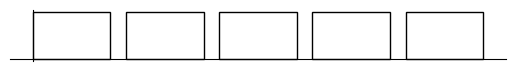

In [506]:
# Пример работы программы

polygons_combined = itertools.islice(gen_rectangle(width, height), 5)

visualise_polygons(polygons_combined)

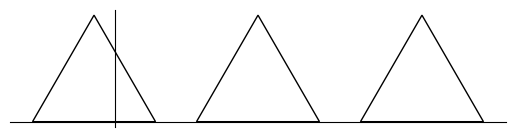

In [18]:
# Пример работы программы

polygons_combined = itertools.islice(gen_triangle(side_length, -2), 3)

visualise_polygons(polygons_combined)

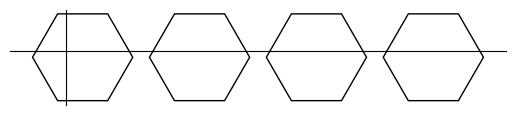

In [19]:
# Пример работы программы

polygons_combined = itertools.islice(gen_hexagon(side_length, -2, -3), 4)

visualise_polygons(polygons_combined)

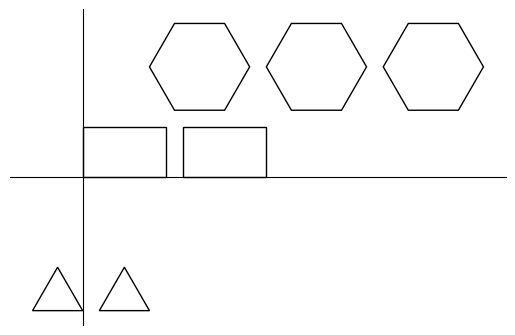

In [7]:
# Пример работы программы

side_length = 3
width = 5
height = 3

rectangles = itertools.islice(gen_rectangle(width, height, 0, 0), 2)
triangles = itertools.islice(gen_triangle(side_length, -3, -8), 2)
hexagons = itertools.islice(gen_hexagon(side_length, 4, 4), 3)

In [813]:
import math

def tr_translate(polygon, dx, dy):
    translated_polygon = tuple((x + dx, y + dy) for x, y in polygon)
    return translated_polygon

def tr_rotate(polygon, angle, center_x, center_y):
    rorated_polygon = []
    
    for point in polygon:
            x = point[0] - center_x
            y = point[1] - center_y
            
            new_x = x * math.cos(math.radians(angle)) - y * math.sin(math.radians(angle))
            new_y = x * math.sin(math.radians(angle)) + y * math.cos(math.radians(angle))
            
            rotated_point = (new_x + center_x, new_y + center_y)
            rorated_polygon.append(rotated_point)
    
    rorated_polygon = tuple(rorated_polygon)
    return rorated_polygon


def tr_symmetry(polygon, center_x, center_y):
    symmetrical_polygon = tuple((2 * center_x - x, 2 * center_y - y) for x, y in polygon)
    return symmetrical_polygon

def tr_homothety(polygon, scale_factor,  center_x=0, center_y=0):
    new_polygon = []
    
    for point in polygon:
        new_point = ((point[0] -  center_x) * scale_factor +  center_x, (point[1] -  center_y) * scale_factor +  center_y)
        new_polygon.append(new_point)

    new_polygon = tuple(new_polygon)
    return new_polygon

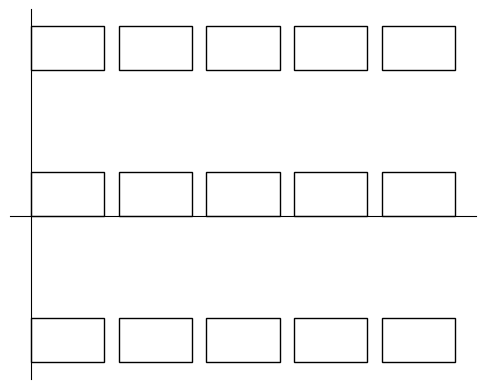

In [808]:
# Пример работы программы

rectangles = list(itertools.islice(gen_rectangle(width, height), 5))
translated_polygons_1 = list(map(lambda polygon: tr_translate(polygon, dx=0, dy=10), rectangles))
translated_polygons_2 = list(map(lambda polygon: tr_translate(polygon, dx=0, dy=-10), rectangles))


polygons_combined = rectangles + translated_polygons_1 + translated_polygons_2

visualise_polygons(polygons_combined)

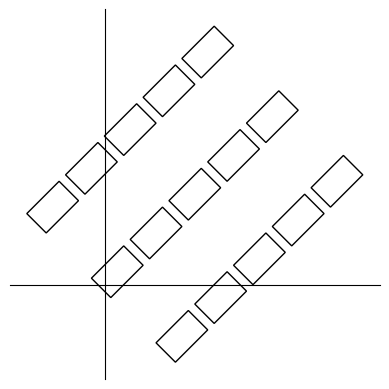

In [809]:
# Пример работы программы

rectangles = list(itertools.islice(gen_rectangle(width, height), 5))



polygons_combined = rectangles + list(translated_polygons_1) + list(translated_polygons_2)
rorated_polygons = list(map(lambda polygon: tr_rotate(polygon, 45, 2, 0), polygons_combined))

visualise_polygons(rorated_polygons)

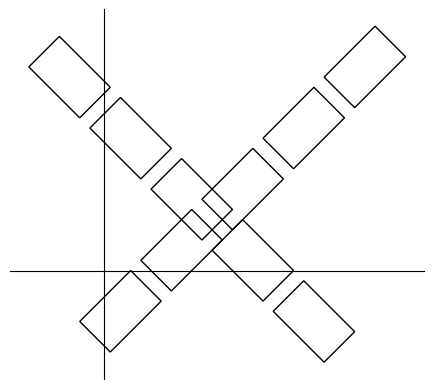

In [810]:
# Пример работы программы

rectangles = list(itertools.islice(gen_rectangle(width, height), 5))
translated_polygons_b1 = list(map(lambda polygon: tr_translate(polygon, dx=-6, dy=0), rectangles))
translated_polygons_b2 = list(map(lambda polygon: tr_translate(polygon, dx=-12, dy=2), rectangles))
rorated_polygons_b1 = list(map(lambda polygon: tr_rotate(polygon, 45, 4, 5), translated_polygons_b1))
rorated_polygons_b2 = list(map(lambda polygon: tr_rotate(polygon, 135, 4, 5), translated_polygons_b2))

polygons_combined_b = rorated_polygons_b1 + rorated_polygons_b2

visualise_polygons(polygons_combined_b)

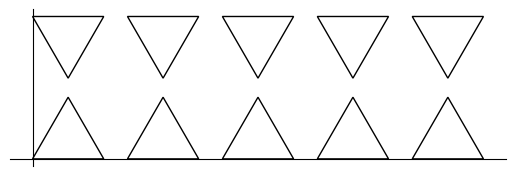

In [811]:
# Пример работы программы

triangles = list(itertools.islice(gen_triangle(side_length), 5))
symmetrical_polygons_c = list(map(lambda polygon: tr_symmetry(polygon, 9.5, 3), triangles))

polygons_combined_c = triangles + symmetrical_polygons_c

visualise_polygons(polygons_combined_c)

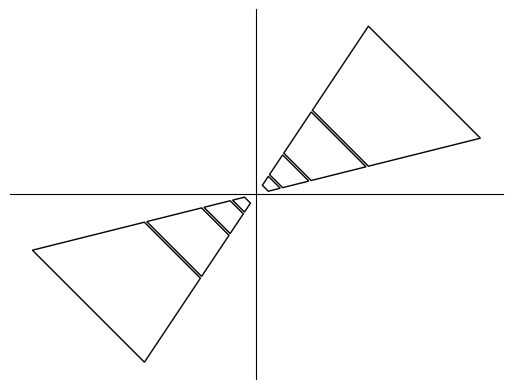

In [814]:
# Пример работы программы

polygon =  [((2, 3), (4, 6), (8, 2), (4, 1))]
scale_factors = [2.2, 4.6, 9.4, -1, -2.2, -4.6, -9.4]

homothety_polygons = list(map(lambda scale_factor: tr_homothety(polygon[0], scale_factor), scale_factors))

polygons_combined_d = homothety_polygons + polygon

visualise_polygons(polygons_combined_d)

In [482]:
def is_convex(polygon):
    n = len(polygon)

    for i in range(n):
        vec1 = (polygon[(i + 1) % n][0] - polygon[i][0], polygon[(i + 1) % n][1] - polygon[i][1])
        vec2 = (polygon[(i + 2) % n][0] - polygon[(i + 1) % n][0], polygon[(i + 2) % n][1] - polygon[(i + 1) % n][1])

        vec_prod = vec1[0] * vec2[1] - vec1[1] * vec2[0]

        if i == 0:
            sign_ = vec_prod
        elif vec_prod * sign_ < 0:
            return False
    return True

[((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (1, 1), (0, 1))]


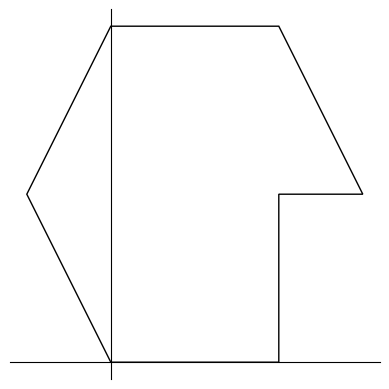

In [483]:
# Пример работы программы

polygons_ = [
    ((0, 0), (1, 0), (1, 1), (0, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

convex_polygons = list(filter(lambda polygon_: is_convex(polygon_), polygons_))
print(convex_polygons)

almost_hexagon = [((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))]
visualise_polygons(almost_hexagon)

In [825]:
def is_short_side_less_min(polygon, user_meaning):
    distance = lambda p1, p2: math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    # print(min(distance(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon))))
    return min(distance(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon))) < user_meaning

In [832]:
# Пример работы программы

polygons = [ 
    ((0, 0), (1, 0), (1, 1), (0, 1)),      # Прямоугольник, min = 1
    ((0, 0), (2, 0), (1.5, 1), (0.5, 1)),  # Трапеция, min = 1
    ((0, 0), (1, 0), (0.5, 1)),            # Треугольник, min = 1
    ((0, 0), (2, 0), (2, 2), (0, 2))       # Прямоугольник, min = 2
]      

user_meaning = 1.5
is_short_less_min_polygons = list(filter(lambda polygon: is_short_side_less_min(polygon, user_meaning), polygons))
print(is_short_less_min_polygons)

[((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (1.5, 1), (0.5, 1)), ((0, 0), (1, 0), (0.5, 1))]


6.222539674441618
13.010764773832474
26.58721497261419
2.8284271247461903
6.222539674441618
13.010764773832474
26.58721497261419
2.8284271247461903


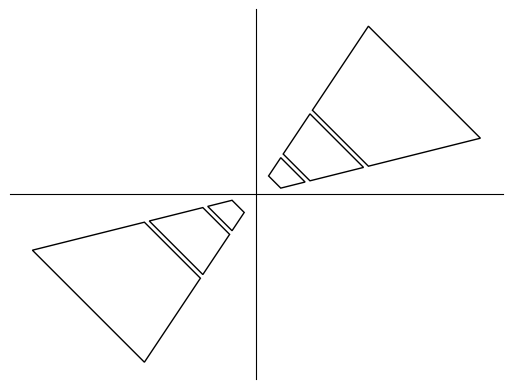

In [519]:
user_meaning = 14
polygons_combined_d_flt = list(filter(lambda polygon: is_short_side_less_min(polygon, user_meaning), polygons_combined_d))
visualise_polygons(polygons_combined_d_flt)

In [520]:
def flt_convex_polygon(func):
    def wrapper(polygons):
        return [polygon for polygon in polygons if is_convex(polygon)]
    return wrapper

In [524]:
# Пример работы программы

@flt_convex_polygon
def process_polygons(polygons):
    return polygons

polygons_ = [
    ((0, 0), (1, 0), (1, 1), (0, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]


convex_polygons_by_dec = process_polygons(polygons_)
print(convex_polygons_by_dec)

[((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (1, 1), (0, 1))]


In [535]:
def tr_translate(dx, dy):
    def dec(func):
        def wrapper(polygons, *args, **kwargs):
            translated_polygons = [func(polygon, dx, dy) for polygon in polygons]
            return translated_polygons
        return wrapper
    return dec

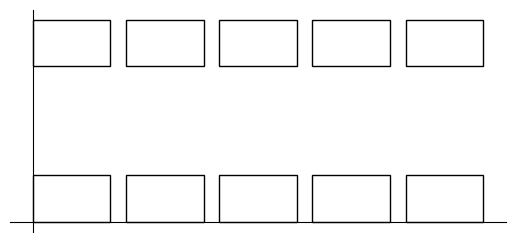

In [544]:
# Пример работы программы

width = 5
height = 3

@tr_translate(dx=0, dy=10)
def process_polygons(polygon, dx, dy):
    return tuple([(x + dx, y + dy) for x, y in polygon])

rectangles = list(itertools.islice(gen_rectangle(width, height), 5))
rectangles_by_dec = process_polygons(rectangles)

polygons_combined = rectangles + rectangles_by_dec

visualise_polygons(polygons_combined)

# Допы

№8

1. Поиск угла, самого близкого к началу координат

In [662]:
def agr_origin_nearest(polygon_1, polygon_2):
         distance = lambda p: math.sqrt(p[0]**2 + p[1]**2)
         nearest_point_in_polygon = lambda polygon: tuple([min(polygon, key=distance)])
         return nearest_point_in_polygon(polygon_1 + polygon_2)

In [663]:
import functools

# Пример работы программы


polygons_ = [
    ((0, 0), (1, 0), (1, 1), (0, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

agr_origin_nearest_meaning = functools.reduce(agr_origin_nearest, polygons_)
agr_origin_nearest_meaning

((0, 0),)

2. Поиск самого длинной стороны многоугольника

In [684]:
def agr_max_side(polygon_1, polygon_2):
    side_length = lambda p1, p2: math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)
    max_side_in_polygon = lambda polygon: max(side_length(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon))) if not isinstance(polygon, float) else polygon
    return max(max_side_in_polygon(polygon_1), max_side_in_polygon(polygon_2))

2.0


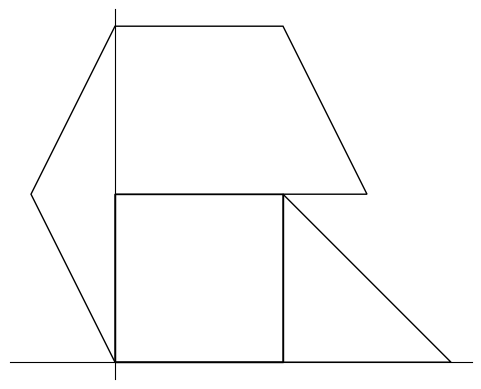

In [686]:
import functools

# Пример работы программы


polygons_ = [
    ((0, 0), (1, 0), (1, 1), (0, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

agr_max_side_meaning = functools.reduce(agr_max_side, polygons_)
print(agr_max_side_meaning)

visualise_polygons(polygons_)

3. Поиск самой маленькой площади многоугольника

In [755]:
import numpy as np

def agr_min_area(polygon_1, polygon_2):
    area = lambda polygon: 1/2 * float(abs(sum([np.linalg.det(np.transpose((polygon[i], polygon[(i + 1) % len(polygon)]))) for i in range(len(polygon))]))) if not isinstance(polygon, float) else polygon
    return min(area(polygon_1), area(polygon_2))

1.0


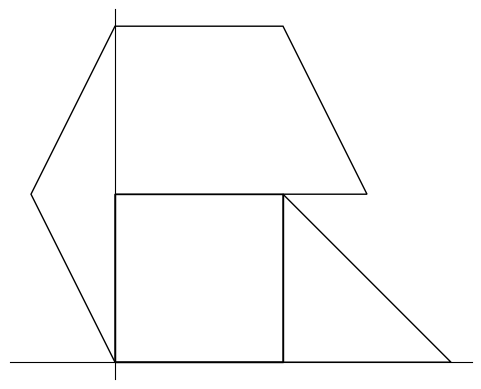

In [756]:
import functools

# Пример работы программы


polygons_ = [
    ((0, 0), (1, 0), (1, 1), (0, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

agr_min_area_meaning = functools.reduce(agr_min_area, polygons_)
print(agr_min_area_meaning)

visualise_polygons(polygons_)

4. Расчет суммарного периметра

In [801]:
from shapely import length
import shapely.geometry as shp_geom

def agr_perimeter(polygon_1, polygon_2):
    perimeter = lambda polygon: float(length(shp_geom.Polygon(polygon))) if not isinstance(polygon, float) else polygon
    return sum([perimeter(polygon_1), perimeter(polygon_2)])

160.0


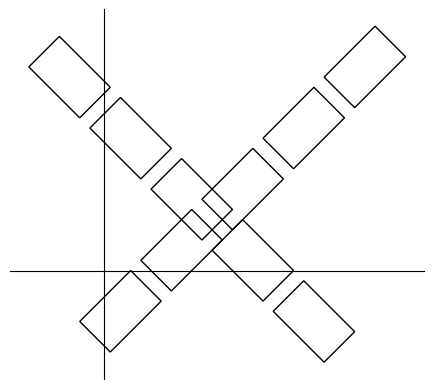

In [815]:
import functools

# Пример работы программы

agr_perimeter_meaning = functools.reduce(agr_perimeter, polygons_combined_b)
print(agr_perimeter_meaning)

visualise_polygons(polygons_combined_b)

5. Расчет суммарной площади

In [821]:
def agr_area(polygon_1, polygon_2):
    area = lambda polygon: 1/2 * float(abs(sum([np.linalg.det(np.transpose((polygon[i], polygon[(i + 1) % len(polygon)]))) for i in range(len(polygon))]))) if not isinstance(polygon, float) else polygon
    return sum([area(polygon_1), area(polygon_2)])

150.00000000000003


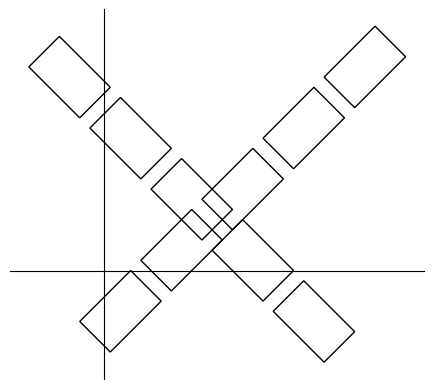

In [824]:
import functools

# Пример работы программы

agr_area_meaning = functools.reduce(agr_area, polygons_combined_b)
print(agr_area_meaning)

visualise_polygons(polygons_combined_b)

№5

2. Фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой

In [836]:
def flt_angle_point(polygon, user_meaning):
    return user_meaning in polygon 

In [838]:
# Пример работы программы

polygons = [ 
    ((0, 0), (1, 0), (1, 1), (0, 1)),      # Прямоугольник
    ((0, 0), (2, 0), (1.5, 1), (0.5, 1)),  # Трапеция
    ((0, 0), (1, 0), (0.5, 1)),            # Треугольник
    ((0, 0), (2, 0), (2, 2), (0, 2))       # Прямоугольник
]      

user_meaning = (0.5, 1)
flt_angle_point_ = list(filter(lambda polygon: flt_angle_point(polygon, user_meaning), polygons))
print(flt_angle_point_)

user_meaning = (0, 0)
flt_angle_point_ = list(filter(lambda polygon: flt_angle_point(polygon, user_meaning), polygons))
print(flt_angle_point_)

[((0, 0), (2, 0), (1.5, 1), (0.5, 1)), ((0, 0), (1, 0), (0.5, 1))]
[((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (2, 0), (1.5, 1), (0.5, 1)), ((0, 0), (1, 0), (0.5, 1)), ((0, 0), (2, 0), (2, 2), (0, 2))]


3. Фильтрации фигур, имеющих площадь меньше заданной 

In [854]:
def flt_square(polygon, user_meaning):
    return 1/2 * float(abs(sum([np.linalg.det(np.transpose((polygon[i], polygon[(i + 1) % len(polygon)]))) for i in range(len(polygon))]))) < user_meaning

In [857]:
# Пример работы программы

polygons = [ 
    ((0, 0), (1, 0), (1, 1), (0, 1)),      # Прямоугольник, S = 1
    ((0, 0), (2, 0), (1.5, 1), (0.5, 1)),  # Трапеция, S = 1.5
    ((0, 0), (1, 0), (0.5, 1)),            # Треугольник, S = 0.5
    ((0, 0), (2, 0), (2, 2), (0, 2))       # Прямоугольник, S = 4
]      

user_meaning = 1.5
flt_square_ = list(filter(lambda polygon: flt_square(polygon, user_meaning), polygons))
print(flt_square_)

[((0, 0), (1, 0), (1, 1), (0, 1)), ((0, 0), (1, 0), (0.5, 1))]


5. Фильтрации выпуклых многоугольников, включающих заданную точку

In [865]:
def flt_point_inside(polygon, user_meaning):
    return shp_geom.Polygon(polygon).contains(shp_geom.Point(user_meaning))

[((1, 0), (2, 0), (2, 1), (1, 1)), ((0, 0), (2, 0), (1, 1), (0, 1))]
[((0, 0), (2, 0), (1, 1), (0, 1)), ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))]
[]
[((1, 0), (2, 0), (2, 1), (1, 1))]


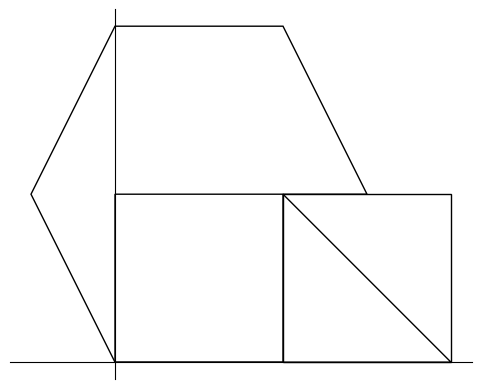

In [885]:
# Пример работы программы


polygons_ = [
    ((1, 0), (2, 0), (2, 1), (1, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

user_meaning = (1.5, 0.4)
flt_point_inside_ = list(filter(lambda polygon: flt_point_inside(polygon, user_meaning), polygons_))
print(flt_point_inside_)

user_meaning = (0.5, 0.5)
flt_point_inside_ = list(filter(lambda polygon: flt_point_inside(polygon, user_meaning), polygons_))
print(flt_point_inside_)

user_meaning = (100, 90)
flt_point_inside_ = list(filter(lambda polygon: flt_point_inside(polygon, user_meaning), polygons_))
print(flt_point_inside_)

user_meaning = (1.5, 0.5)
flt_point_inside_ = list(filter(lambda polygon: flt_point_inside(polygon, user_meaning), polygons_))
print(flt_point_inside_)

visualise_polygons(polygons_)

6. Фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника

In [903]:
def flt_polygon_angles_inside(polygon, user_meaning):
    for point in user_meaning:
        if flt_point_inside(polygon, point):
            return True
    return False

[]


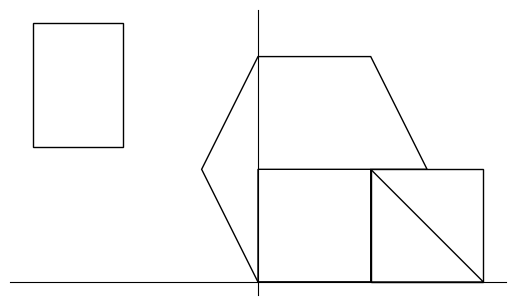

In [904]:
# Пример работы программы


polygons_ = [
    ((1, 0), (2, 0), (2, 1), (1, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

user_meaning = ((-2, 1.2), (-1.2, 1.2), (-1.2, 2.3), (-2, 2.3))
flt_polygon_angles_inside_ = list(filter(lambda polygon: flt_polygon_angles_inside(polygon, user_meaning), polygons_))
print(flt_polygon_angles_inside_)

polygons_ += [user_meaning]

visualise_polygons(polygons_)

[((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))]


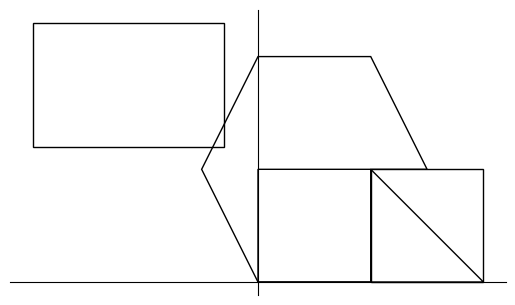

In [905]:
# Пример работы программы


polygons_ = [
    ((1, 0), (2, 0), (2, 1), (1, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

user_meaning = ((-2, 1.2), (-0.3, 1.2), (-0.3, 2.3), (-2, 2.3))
flt_polygon_angles_inside_ = list(filter(lambda polygon: flt_polygon_angles_inside(polygon, user_meaning), polygons_))
print(flt_polygon_angles_inside_)

polygons_ += [user_meaning]

visualise_polygons(polygons_)

[((1, 0), (2, 0), (2, 1), (1, 1)), ((0, 0), (2, 0), (1, 1), (0, 1))]


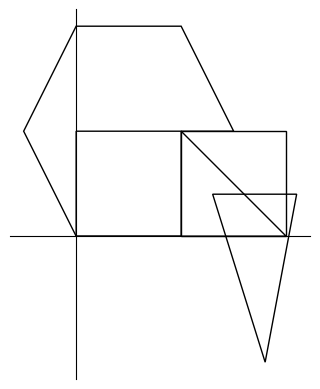

In [907]:
# Пример работы программы


polygons_ = [
    ((1, 0), (2, 0), (2, 1), (1, 1)),                               # Прямоугольник (выпуклый)
    ((0, 0), (2, 0), (1, 1), (0, 1)),                               # Трапеция (выпуклая)
    ((0, 0), (1, 0), (1, 1), (1.5, 1), (1, 2), (0, 2), (-0.5, 1))   # "Почти шестиугольник" (невыпуклая)
]

user_meaning = ((1.8, -1.2), (2.1, 0.4), (1.3, 0.4))
flt_polygon_angles_inside_ = list(filter(lambda polygon: flt_polygon_angles_inside(polygon, user_meaning), polygons_))
print(flt_polygon_angles_inside_)

polygons_ += [user_meaning]

visualise_polygons(polygons_)

№9

In [926]:
def zip_polygons(*iterators):
    return [sum(polygon, ()) for polygon in zip(*iterators)]

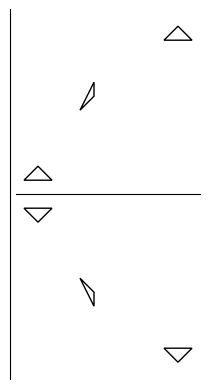

In [954]:
# Пример работы программы:

polygons_1 = [((1, 1), (2, 2), (3, 1)), ((11, 11), (12, 12), (13, 11)), ((5, 6), (6, 8), (6, 7))]
polygons_2 = [((3, -1), (2, -2), (1, -1)), ((13, -11), (12, -12), (11, -11)), ((6, -7), (6, -8), (5, -6))]

zip_polygons_meaning = zip_polygons(polygons_1, polygons_2)

visualise_polygons(polygons_1 + polygons_2)

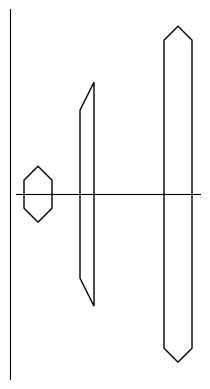

In [955]:
visualise_polygons(zip_polygons_meaning)

In [962]:
def count_2D(start_pose, steps):
    return list(itertools.starmap(lambda step1, step2: ((start_pose[0], start_pose[1]), (start_pose[0] + step1, start_pose[1] + step2), (start_pose[0] + 2 * step1, start_pose[1] + 2 * step2)), steps))

[((1, 2), (2, 3), (3, 4)), ((1, 2), (-1, 6), (-3, 10)), ((1, 2), (9, -3), (17, -8))]


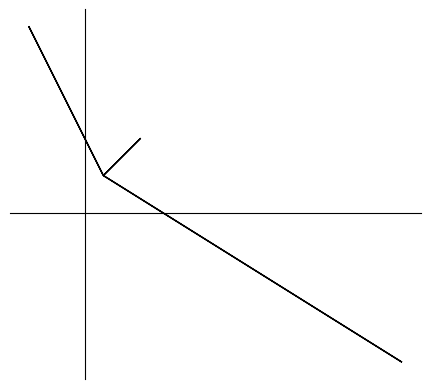

In [966]:
# Пример работы программы

start = (1, 2)
steps = [(1, 1), (-2, 4), (8, -5)]

count_2D_meaning = count_2D(start, steps)

print(count_2D_meaning)

visualise_polygons(count_2D_meaning)

In [967]:
def zip_tuple(*iterators):
    return tuple(zip(*iterators))

(((1, 1), (2, 2), (3, 1)), ((4, 4), (5, 5), (6, 4)), ((7, 7), (8, 8), (9, 7)), ((10, 10), (11, 11), (12, 10)))


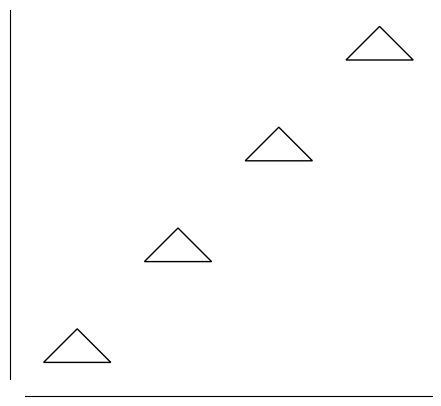

In [971]:
# Пример работы программы

iterator1 = [(1, 1), (4, 4), (7, 7), (10, 10)]
iterator2 = [(2, 2), (5, 5), (8, 8), (11, 11)]
iterator3 = [(3, 1), (6, 4), (9, 7), (12, 10)]

zip_tuple_meaning = zip_tuple(iterator1, iterator2, iterator3)

print(zip_tuple_meaning)

visualise_polygons(zip_tuple_meaning)

№6

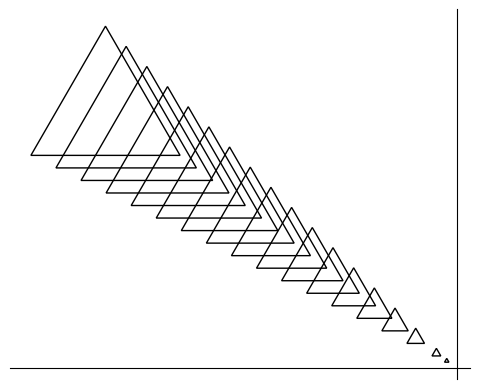

In [1036]:
polygons_6b = list(itertools.islice(gen_triangle(1.4, -4, 2), 1))
scale_factors = list(range(2, 100, 2))[:17:]
homothety_polygons_6b = list(map(lambda scale_factor: tr_homothety(polygons_6b[0], scale_factor), scale_factors))

polygons_combined_6b = homothety_polygons_6b + polygons_6b

visualise_polygons(polygons_combined_6b)

[((-8, 4), (-6.6, 6.4248711305964274), (-5.2, 4)), ((-16, 8), (-13.2, 12.849742261192855), (-10.4, 8)), ((-24, 12), (-19.799999999999997, 19.27461339178928), (-15.600000000000001, 12)), ((-4, 2), (-3.3, 3.2124355652982137), (-2.6, 2))]


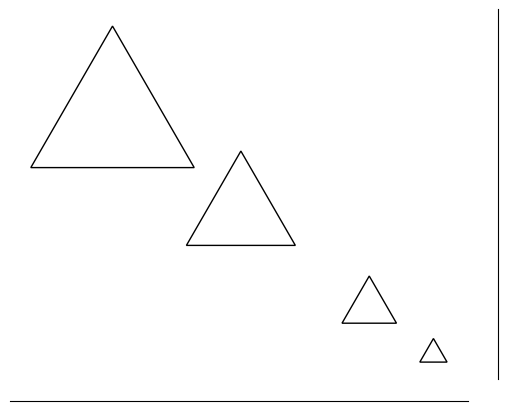

In [1041]:
user_meaning = 10
is_short_less_min_polygons_6b = list(filter(lambda polygon: is_short_side_less_min(polygon, user_meaning), polygons_combined_6b))
print(is_short_less_min_polygons_6b)

visualise_polygons(is_short_less_min_polygons_6b)

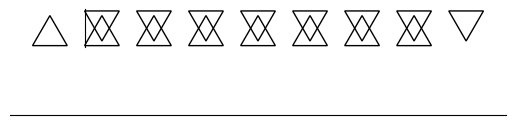

In [1044]:
polygons_6c = list(itertools.islice(gen_triangle(2, -3, 4), 8))
symmetrical_polygons_6c = list(map(lambda polygon: tr_symmetry(polygon, 10, 5), polygons_6c))

polygons_combined_6c = polygons_6c + symmetrical_polygons_6c

visualise_polygons(polygons_combined_6c)

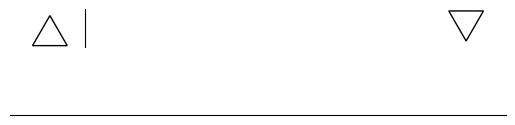

In [1059]:
flt_polygon_angles_inside_6c = []

for ind_ in range(len(polygons_combined_6c)):
    copy_ = polygons_combined_6c.copy()
    copy_.pop(ind_)
    
    user_meaning = tuple(point__ for polygon__ in copy_ for point__ in polygon__)
    
    flt_polygon_angles_inside_6c += list(filter(lambda polygon: not(flt_polygon_angles_inside(polygon, user_meaning)), [polygons_combined_6c[ind_]]))

visualise_polygons(flt_polygon_angles_inside_6c)